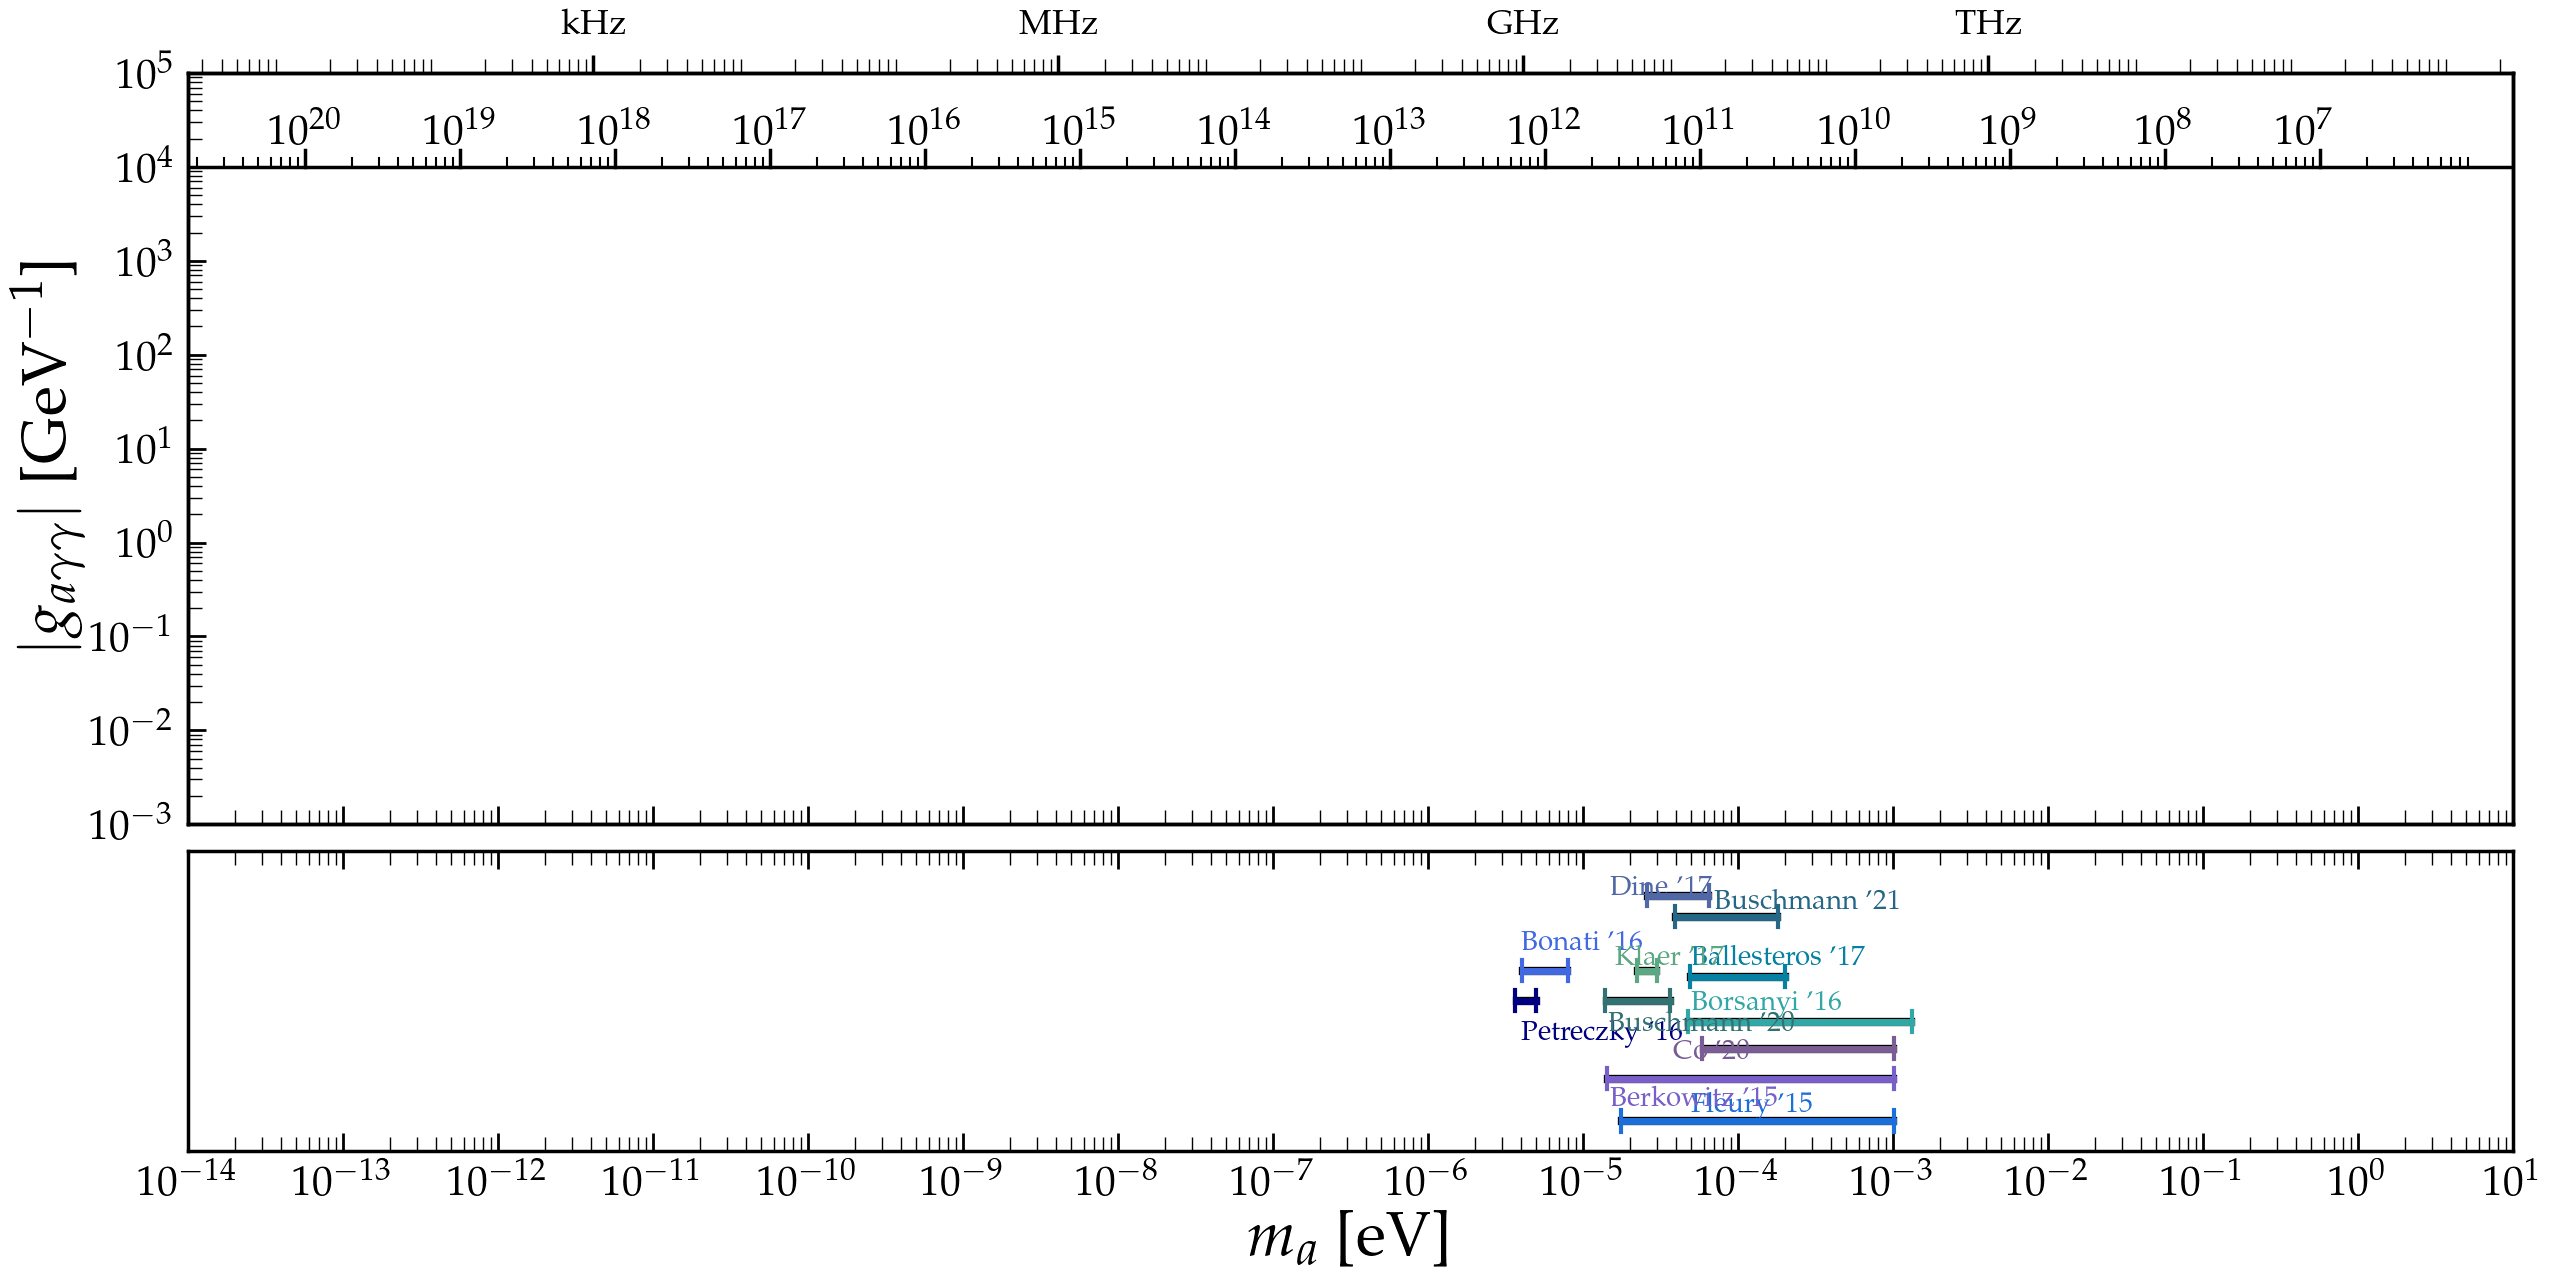

In [15]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from PlotFuncs import MyDoublePlot_Vertical,AxionPhoton,MySaveFig,UpperFrequencyAxis_Simple,col_alpha,FigSetup,line_background

def UpperPQAxis(ax,tickdir='in',xtick_rotation=0,labelsize=25,xlabel=r"PQ scale $f_a$ [GeV]",lfs=40,tick_pad=8,tfs=25,xlabel_pad=10):
    m_min,m_max = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlabel(xlabel,fontsize=lfs,labelpad=xlabel_pad)
    ax2.set_xscale('log')
    plt.xticks(rotation=xtick_rotation)
    ax2.tick_params(labelsize=tfs)
    ax2.tick_params(which='major',direction=tickdir,width=2.5,length=13,pad=tick_pad)
    ax2.tick_params(which='minor',direction=tickdir,width=1,length=10)
    locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
    ax2.xaxis.set_major_locator(locmaj)
    ax2.xaxis.set_minor_locator(locmin)
    ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax2.set_xlim([1e12*(5.7e-6/m_min),1e12*(5.7e-6/m_max)])
    plt.sca(ax)

def PlotDimensionlessCoupling(ax,filename,edgecolor='k',facecolor='crimson',alpha=1,lw=2,y2=1e10):
    dat = loadtxt(filename)
    ax.fill_between(dat[:,0],dat[:,1]/(2e-10*dat[:,1]),y2=y2,color=facecolor,alpha=alpha)
    ax.plot(dat[:,0],dat[:,1]/(2e-10*dat[:,1]),color=edgecolor)
    return

m_min = 1e-14
m_max = 1e1
C_min = 1e-3
C_max = 1e5

fig,ax1,ax2 = MyDoublePlot_Vertical('','$|g_{a\gamma\gamma}|$ [GeV$^{-1}$]','$m_a$ [eV]',size_x=30)

ax1.set_xlim([m_min,m_max])
ax1.set_ylim([C_min,C_max])
ax2.set_xlim([m_min,m_max])
ax2.set_ylim([0,1])
             
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax1.xaxis.set_major_locator(locmaj)
ax1.xaxis.set_minor_locator(locmin)
ax1.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.xaxis.set_major_locator(locmaj)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax1.set_xticklabels([])
ax2.set_yticks([])

UpperFrequencyAxis_Simple(ax1,labelsize=25)


def PlotTheoryMass(ax,file,y,ybar=0.035,color='blue',lw=5,label='',text_pos=[1.0,1.0],fs=20):
    m_low,m_high = loadtxt('limit_data/AxionMass/'+file+'.txt',unpack=True)
    ax.plot([m_low,m_high],[y,y],'-',color=color,lw=5,path_effects=line_background(6,'k'))
    ax.plot([m_low*0.98,m_low*0.98],[y-ybar,y+ybar],'-',lw=3,color=color)
    ax.plot([m_high*1.01,m_high*1.01],[y-ybar,y+ybar],'-',lw=3,color=color)
    
    ax.text(text_pos[0],text_pos[1],label,fontsize=fs,color=color,rotation=0,clip_on=True)
    return
PlotTheoryMass(ax2,'Ballesteros16',0.58,color='#0581a3',text_pos=[50e-6,0.62],label="Ballesteros '17")
PlotTheoryMass(ax2,'Dine17',0.85,color='#5068a6',text_pos=[1.5e-5,0.85],label="Dine '17")
PlotTheoryMass(ax2,'Borsanyi16',0.43,color='#32a8a6',text_pos=[5e-5,0.47],label="Borsanyi '16")
PlotTheoryMass(ax2,'Fleury15',0.1,color='#1c6ed9',text_pos=[5e-5,0.13],label="Fleury '15")
PlotTheoryMass(ax2,'Berkowitz15',0.24,color='#785fc9',text_pos=[15e-6,0.15],label="Berkowitz '15")
PlotTheoryMass(ax2,'Bonati16',0.6,color='royalblue',text_pos=[4e-6,0.67],label="Bonati '16")
PlotTheoryMass(ax2,'Petreczky16',0.5,color='navy',text_pos=[4e-6,0.37],label="Petreczky '16")
PlotTheoryMass(ax2,'Klaer17',0.6,color='#5da884',text_pos=[1.6e-5,0.62],label="Klaer '17")
PlotTheoryMass(ax2,'Buschmann21',0.78,color='#266787',text_pos=[0.7e-4,0.805],label="Buschmann '21")
PlotTheoryMass(ax2,'Buschmann20',0.5,color='#327273',text_pos=[1.443e-5,0.4],label="Buschmann '20")
PlotTheoryMass(ax2,'Co20',0.34,color='#7a5d94',text_pos=[38e-6,0.31],label="Co '20")

